In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
%store -r df
%store -r df1
%store -r df2
%store -r df2_no_dups
%store -r df3
%store -r df3_no_dups
%store -r df_dur_readytoship_truck
%store -r df_dur_readytoship_truck_standard
%store -r df_dur_readytoship_truck_xpress
%store -r df_no_dups
%store -r df_order_del_time
%store -r df_order_del_time2
%store -r df_order_del_total
%store -r df_prep_dur_ver

In [3]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df1.columns = map(str.lower, df1.columns)
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = map(str.lower, df2.columns)
df2.columns = df2_no_dups.columns.str.replace(' ', '_')
df2_no_dups.columns = map(str.lower, df2.columns)
df2_no_dups.columns = df2_no_dups.columns.str.replace(' ', '_')
df3.columns = map(str.lower, df3.columns)
df3.columns = df3_no_dups.columns.str.replace(' ', '_')
df3_no_dups.columns = map(str.lower, df3_no_dups.columns)
df3_no_dups.columns = df3_no_dups.columns.str.replace(' ', '_')
df_dur_readytoship_truck.columns = map(str.lower, df_dur_readytoship_truck.columns)
df_dur_readytoship_truck.columns = df_dur_readytoship_truck.columns.str.replace(' ', '_')
df_dur_readytoship_truck_standard.columns = map(str.lower, df_dur_readytoship_truck_standard.columns)
df_dur_readytoship_truck_standard.columns = df_dur_readytoship_truck_standard.columns.str.replace(' ', '_')
df_dur_readytoship_truck_xpress.columns = map(str.lower, df_dur_readytoship_truck_xpress.columns)
df_dur_readytoship_truck_xpress.columns = df_dur_readytoship_truck_xpress.columns.str.replace(' ', '_')
df_no_dups.columns = map(str.lower, df_no_dups.columns)
df_no_dups.columns = df_no_dups.columns.str.replace(' ', '_')
df_order_del_time.columns = map(str.lower, df_order_del_time.columns)
df_order_del_time.columns = df_order_del_time.columns.str.replace(' ', '_')
df_order_del_time2.columns = map(str.lower, df_order_del_time2.columns)
df_order_del_time2.columns = df_order_del_time2.columns.str.replace(' ', '_')
df_order_del_total.columns = map(str.lower, df_order_del_total.columns)
df_order_del_total.columns = df_order_del_total.columns.str.replace(' ', '_')
df_prep_dur_ver.columns = map(str.lower, df_prep_dur_ver.columns)
df_prep_dur_ver.columns = df_prep_dur_ver.columns.str.replace(' ', '_')

In [4]:
display(df.sample(5))
display(df1.sample(5))
display(df2.sample(5))
display(df2_no_dups.sample(5))
display(df3.sample(5))
display(df3_no_dups.sample(5))
display(df_dur_readytoship_truck.sample(5))
display(df_dur_readytoship_truck_standard.sample(5))
display(df_dur_readytoship_truck_xpress.sample(5))
display(df_no_dups.sample(5))
display(df_order_del_time.sample(5))
display(df_order_del_time2.sample(5))
display(df_order_del_total.sample(5))
display(df_prep_dur_ver.sample(5))

,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
7113,CA-2017-155208,2017-04-16,Standard Class,SP-20650,Stephanie Phelps,United States,Wilmington,North Carolina,28403.0,South,OFF-AR-10003478,39.072,6,0.2,9.7680
5807,CA-2018-143077,2018-09-17,Standard Class,SF-20965,Sylvia Foulston,United States,Houston,Texas,77041.0,Central,OFF-BI-10000088,6.588,3,0.8,-10.2114
4609,CA-2017-108903,2017-10-03,First Class,DO-13435,Denny Ordway,United States,Columbus,Ohio,43229.0,East,OFF-EN-10004030,14.480,5,0.2,4.8870
9741,CA-2020-145702,2020-05-19,Second Class,AH-10075,Adam Hart,United States,Knoxville,Tennessee,37918.0,South,FUR-CH-10001482,314.352,3,0.2,-35.3646
5241,CA-2020-151484,2020-04-20,First Class,CV-12805,Cynthia Voltz,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-ST-10000142,332.704,1,0.2,33.2704


,order_id,arrival_scan_date
177,CA-2019-106341,2019-10-30
197,CA-2019-161669,2019-11-18
157,CA-2019-144939,2019-10-14
267,CA-2019-167507,2020-01-06
190,CA-2019-146913,2019-11-11


,Order_ID,On_Truck_Scan_Date,Ship_Mode
2365,CA-2019-134425,2019-12-16,Standard Processing
5684,CA-2020-102099,2020-12-21,Express
3822,US-2020-124303,2020-07-15,Standard Processing
3272,CA-2020-144498,2020-05-06,Express
2964,CA-2020-129567,2020-03-25,Standard Processing


,order_id,on_truck_scan_date,ship_mode
2657,CA-2020-157252,2020-01-24,Standard Processing
3653,US-2020-133781,2020-06-24,Express
5226,CA-2020-112529,2020-11-23,Express
5720,CA-2020-147333,2020-12-23,Standard Processing
630,CA-2019-138282,2019-05-28,Standard Processing


,Order_ID,Ready_to_Ship_Date,Pickup_Date
158,CA-2020-152912,2020-11-12,2020-11-13
189,CA-2020-123624,2020-11-17,2020-11-18
233,CA-2020-126242,2020-11-24,2020-11-25
254,CA-2020-103380,2020-11-27,2020-11-30
250,CA-2020-105130,2020-11-27,2020-11-30


,order_id,ready_to_ship_date,pickup_date
245,CA-2020-100811,2020-11-26,2020-11-27
64,CA-2019-137176,2019-09-16,2019-09-18
94,CA-2019-100944,2019-09-30,2019-10-02
213,CA-2020-165687,2020-11-23,2020-11-25
113,CA-2020-103009,2020-11-05,2020-11-06


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
60,CA-2019-100944,2019-10-02,Standard Processing,2019-09-30,2019-10-02,2 days,Wednesday
9,CA-2019-106950,2019-09-09,Standard Processing,2019-09-06,2019-09-09,3 days,Monday
125,CA-2020-110842,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days,Wednesday
77,CA-2020-163188,2020-11-09,Express,2020-11-09,2020-11-09,0 days,Monday
178,CA-2020-110443,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days,Monday


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
117,CA-2020-149944,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days,Wednesday
121,CA-2020-159597,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days,Wednesday
12,US-2019-147711,2019-09-11,Standard Processing,2019-09-09,2019-09-11,2 days,Wednesday
188,CA-2020-164028,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days,Wednesday
111,CA-2020-107720,2020-11-16,Standard Processing,2020-11-13,2020-11-16,3 days,Monday


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
152,CA-2020-105543,2020-11-25,Express,2020-11-24,2020-11-25,1 days,Wednesday
153,CA-2020-162250,2020-11-25,Express,2020-11-24,2020-11-25,1 days,Wednesday
134,CA-2020-121468,2020-11-20,Express,2020-11-20,2020-11-20,0 days,Friday
145,CA-2020-112529,2020-11-23,Express,2020-11-23,2020-11-23,0 days,Monday
11,CA-2019-110023,2019-09-11,Express,2019-09-11,2019-09-11,0 days,Wednesday


,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
9013,US-2018-139675,2018-03-13,Second Class,NF-18595,Nicole Fjeld,United States,Chico,California,95928.0,West,FUR-FU-10001979,327.760,8,0.0,91.7728
6113,CA-2017-129364,2017-12-08,Standard Class,TB-21250,Tim Brockman,United States,Salem,Oregon,97301.0,West,OFF-BI-10001132,6.456,4,0.7,-4.5192
8534,US-2020-118087,2020-09-09,Standard Class,SP-20620,Stefania Perrino,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-FU-10001867,17.024,2,0.2,1.7024
9060,CA-2018-145394,2018-11-16,Standard Class,MC-17605,Matt Connell,United States,Chicago,Illinois,60610.0,Central,FUR-FU-10001215,34.504,2,0.6,-15.5268
9506,CA-2020-142622,2020-10-30,First Class,JK-15625,Jim Karlsson,United States,Seattle,Washington,98115.0,West,FUR-CH-10003833,97.568,2,0.2,-6.0980


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
249,CA-2019-142594,2019-12-11,Standard Processing,2019-12-13,2 days
310,CA-2020-114370,2020-03-20,Standard Processing,2020-03-23,3 days
71,CA-2019-145499,2019-05-31,Express,2019-06-05,5 days
217,CA-2019-160129,2019-11-25,Express,2019-11-29,4 days
195,CA-2019-161669,2019-11-12,Express,2019-11-18,6 days


,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
20,CA-2019-141551,2019-10-07,2019-09-30,2019-10-02,5 days
15,CA-2019-102932,2019-09-30,2019-09-23,2019-09-25,5 days
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18,5 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days
16,CA-2019-168557,2019-09-30,2019-09-23,2019-09-25,5 days


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time
493,US-2019-155103,2019-12-16,2019-12-02,JF-15190,Jamie Frazer,14 days
369,CA-2019-157280,2019-11-11,2019-11-05,LW-17125,Liz Willingham,6 days
416,CA-2019-134110,2019-11-25,2019-11-17,BG-11035,Barry Gonzalez,8 days
354,CA-2019-146682,2019-11-07,2019-10-29,KW-16435,Katrina Willman,9 days
105,CA-2019-130638,2019-05-27,2019-05-16,SC-20095,Sanjit Chand,11 days


,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,prep_duration,prep_duration
128,CA-2020-156622,2020-11-23,JP-15460,Jennifer Patt,2020-11-26,2020-11-27,Monday,3,3 days
193,US-2020-132444,2020-11-18,CD-12280,Christina DeMoss,2020-11-23,2020-11-23,Wednesday,5,5 days
25,US-2020-102904,2020-11-13,CB-12025,Cassandra Brandow,2020-11-20,2020-11-23,Friday,7,7 days
385,CA-2020-141439,2020-11-26,TT-21460,Tonja Turnell,2020-12-01,2020-12-02,Thursday,5,5 days
50,US-2020-168116,2020-11-04,GT-14635,Grant Thornton,2020-11-04,2020-11-04,Wednesday,0,0 days


In [5]:
#df_prep_dur_ver['weekday'] = df_prep_dur_ver['order_date'].dt.day_name()

#df_prep_dur_ver

In [6]:
df_prep_dur_ver.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,prep_duration,prep_duration
270,CA-2019-106950,2019-09-02,JE-15715,Joe Elijah,2019-09-06,2019-09-09,Monday,4,4 days
318,CA-2019-106950,2019-09-02,JE-15715,Joe Elijah,2019-09-06,2019-09-09,Monday,4,4 days
53,CA-2020-165687,2020-11-17,CS-12355,Christine Sundaresam,2020-11-23,2020-11-25,Tuesday,6,6 days
77,CA-2020-160514,2020-11-12,DB-13120,David Bremer,2020-11-16,2020-11-18,Thursday,4,4 days
139,CA-2020-122700,2020-11-26,LT-17110,Liz Thompson,2020-11-30,2020-12-02,Thursday,4,4 days
38,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,Tuesday,1,1 days
36,CA-2019-123120,2019-09-04,CV-12295,Christina VanderZanden,2019-09-09,2019-09-11,Wednesday,5,5 days
382,CA-2019-131205,2019-09-04,AA-10645,Anna Andreadi,2019-09-09,2019-09-11,Wednesday,5,5 days
264,CA-2019-150007,2019-09-11,AS-10090,Adam Shillingsburg,2019-09-16,2019-09-18,Wednesday,5,5 days
147,CA-2020-164168,2020-11-12,LS-16975,Lindsay Shagiari,2020-11-18,2020-11-20,Thursday,6,6 days


In [7]:
# Group the data by weekday and find the maximum preparation duration for each weekday
max_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].max()

# Print or analyze the maximum preparation duration for each weekday
print("Maximum preparation duration for each weekday:")
print(max_prep_duration_by_weekday)


Maximum preparation duration for each weekday:
          prep_duration prep_duration
weekday                              
Friday                7        7 days
Monday                7        7 days
Saturday              6        6 days
Sunday                8        8 days
Thursday              6        6 days
Tuesday               7        7 days
Wednesday             6        6 days


In [8]:
# Group the data by weekday and find the minimum preparation duration for each weekday
min_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].min()

# Print or analyze the minimum preparation duration for each weekday
print("Minimum preparation duration for each weekday:")
print(min_prep_duration_by_weekday)


Minimum preparation duration for each weekday:
          prep_duration prep_duration
weekday                              
Friday                0        0 days
Monday                0        0 days
Saturday              2        2 days
Sunday                4        4 days
Thursday              0        0 days
Tuesday               0        0 days
Wednesday             0        0 days


In [13]:
# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()


#average_prep_duration_by_weekday.sort_values(ascending=False)



<Figure size 700x400 with 0 Axes>

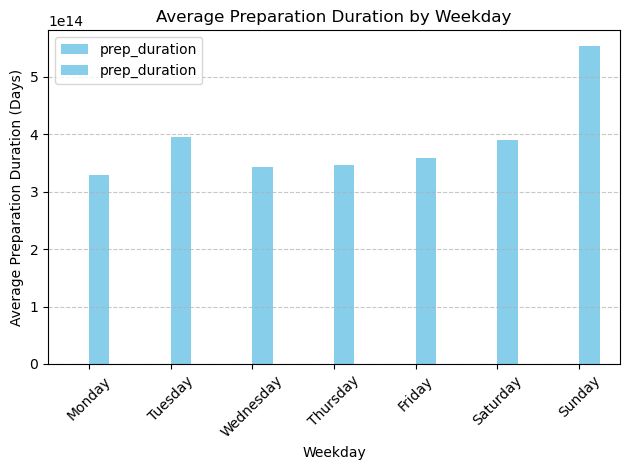

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()

# Create a bar plot
plt.figure(figsize=(7, 4))
average_prep_duration_by_weekday.loc[custom_order].plot(kind='bar', color='skyblue')
plt.title('Average Preparation Duration by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#KPI 1 order date - ready to ship date
# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Order the weekdays by their natural order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots with ordered weekdays and blue color
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Blues',
            order=weekdays_order, medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 700x400 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as a violin plot with custom weekday order
plt.figure(figsize=(7, 4))
sns.violinplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Blues', order=custom_order)
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 700x400 with 0 Axes>

In [ ]:
import numpy as np

# Define the norm for preparation time
norm_prep_time = 2

# Create bins for categorizing preparation duration
bins = [-np.inf, norm_prep_time-1, norm_prep_time+1, np.inf]
labels = ['Early', 'On Time', 'Late']

# Create a new column 'status' to indicate the status of each order
df_prep_dur_ver['status'] = pd.cut(df_prep_dur_ver['prep_duration'], bins=bins, labels=labels)

# Count the number of orders in each status category
status_counts = df_prep_dur_ver['status'].value_counts()

# Print the counts
print("Number of orders by status:")
print(status_counts)



In [ ]:
status_counts_percent = (status_counts/418).round(2)
status_counts_percent

In [ ]:
df_prep_dur_ver.describe()

In [ ]:
# KPI 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_dur_readytoship_truck' is your DataFrame containing the data

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by ship mode and calculate the average duration for each mode
average_duration_by_ship_mode = df_dur_readytoship_truck.groupby('ship_mode')['shipment_duration'].mean()

# Plot the average duration by ship mode
plt.figure(figsize=(7, 4))
average_duration_by_ship_mode.plot(kind='bar', color='skyblue')
plt.title('Average Shipment Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipment Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by weekday and ship mode and calculate the average duration for each weekday and ship mode combination
average_duration_by_weekday_and_ship_mode = df_dur_readytoship_truck.groupby(['weekday', 'ship_mode'])['shipment_duration'].mean().reset_index()

# Plot the average duration by ship mode for each weekday
plt.figure(figsize=(7, 4))
sns.barplot(x='weekday', y='shipment_duration', hue='ship_mode', data=average_duration_by_weekday_and_ship_mode, palette='Blues', order=custom_order)
plt.title('Average Shipment Duration by Ship Mode for Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Shipment Duration (Days)')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filter the DataFrame for Tuesdays and Thursdays
tuesday_thursday_orders = df_dur_readytoship_truck[(df_dur_readytoship_truck['weekday'] == 'Tuesday') | (df_dur_readytoship_truck['weekday'] == 'Thursday')]

# Print the filtered DataFrame
tuesday_thursday_orders.head(20)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as grouped boxplots for each weekday and shipping mode with custom order
plt.figure(figsize=(7, 4))
sns.boxplot(x='weekday', y='shipment_duration', hue='ship_mode', data=df_dur_readytoship_truck, palette='Blues', order=custom_order)
plt.title('Distribution of Shipment Duration by Weekday and Shipping Mode')
plt.xlabel('Weekday')
plt.ylabel('Shipment Duration (Days)')
plt.legend(title='Shipping Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#KPI 3

In [ ]:
df_order_del_time.head()


In [ ]:
import pandas as pd

# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

print(average_delivery_time)


In [ ]:
# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_delivery_time.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_order_del_time2.head()

In [ ]:
# Calculate the average delivery time
average_delivery_time2 = df_order_del_time2['delivery_time2'].mean()

print("Average Delivery Time from DataFrame 2:", average_delivery_time2)


In [ ]:
#kpi 4

In [ ]:
df_order_del_total.head()

In [ ]:
# Convert 'order_date' to datetime if it's not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])

# Add a new column for weekdays
df_order_del_total['order_weekday'] = df_order_del_total['order_date'].dt.day_name()

df_order_del_total.sample(3)



In [ ]:
# Group by weekday and calculate average delivery time
average_delivery_time_weekday = df_order_del_total.groupby('order_weekday')['total_delivery_time'].mean()

print(average_delivery_time_weekday)


In [ ]:
import pandas as pd

# Assuming df_order_del_total is your DataFrame

# Convert 'order_date' and 'arrival_scan_date' to datetime if they're not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])
df_order_del_total['arrival_scan_date'] = pd.to_datetime(df_order_del_total['arrival_scan_date'])

# Calculate the order time in hours
df_order_del_total['order_time_hours'] = (df_order_del_total['arrival_scan_date'] - df_order_del_total['order_date']).dt.total_seconds() / 3600

df_order_del_total.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_order_del_total is your DataFrame

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_hours', data=df_order_del_total, palette='Blues', order=weekday_order)
plt.title('Order Time in Hours by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_days', data=df_order_del_total, palette='Blues', order=weekday_order, medianprops={'color':'red'})
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting scatter plot
plt.figure(figsize=(7, 4))
sns.scatterplot(x='order_weekday', y='order_time_days', data=df_order_del_total, color='blue', s=100)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting area plot
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.fill_between(df_order_del_total['order_weekday'], df_order_del_total['order_time_days'], color='skyblue', alpha=0.3)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate average delivery time in days
average_delivery_time_days = df_order_del_total['total_delivery_time_days'].mean()

# Plotting scatter plot with average line
plt.figure(figsize=(7, 4))
plt.scatter(df_order_del_total.index, df_order_del_total['total_delivery_time_days'], color='blue', alpha=0.5)
plt.axhline(y=average_delivery_time_days, color='red', linestyle='-', label=f'Average Delivery Time: {average_delivery_time_days:.2f} days')
plt.title('Delivery Time for Each Order')
plt.xlabel('Order Index')
plt.ylabel('Delivery Time (days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()